# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [36]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [37]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

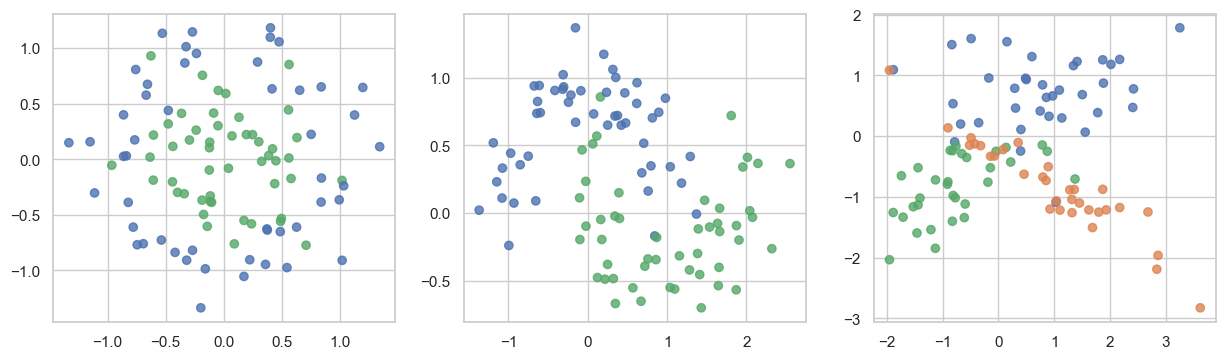

In [38]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [39]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

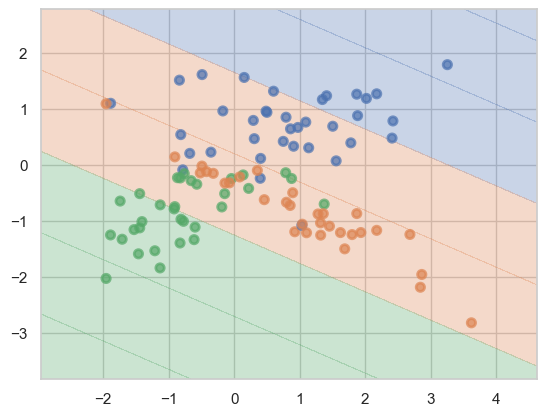

In [40]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет 1: train=1.000, test=0.767, diff=0.233
Датасет 2: train=1.000, test=0.867, diff=0.133
Датасет 3: train=1.000, test=0.800, diff=0.200


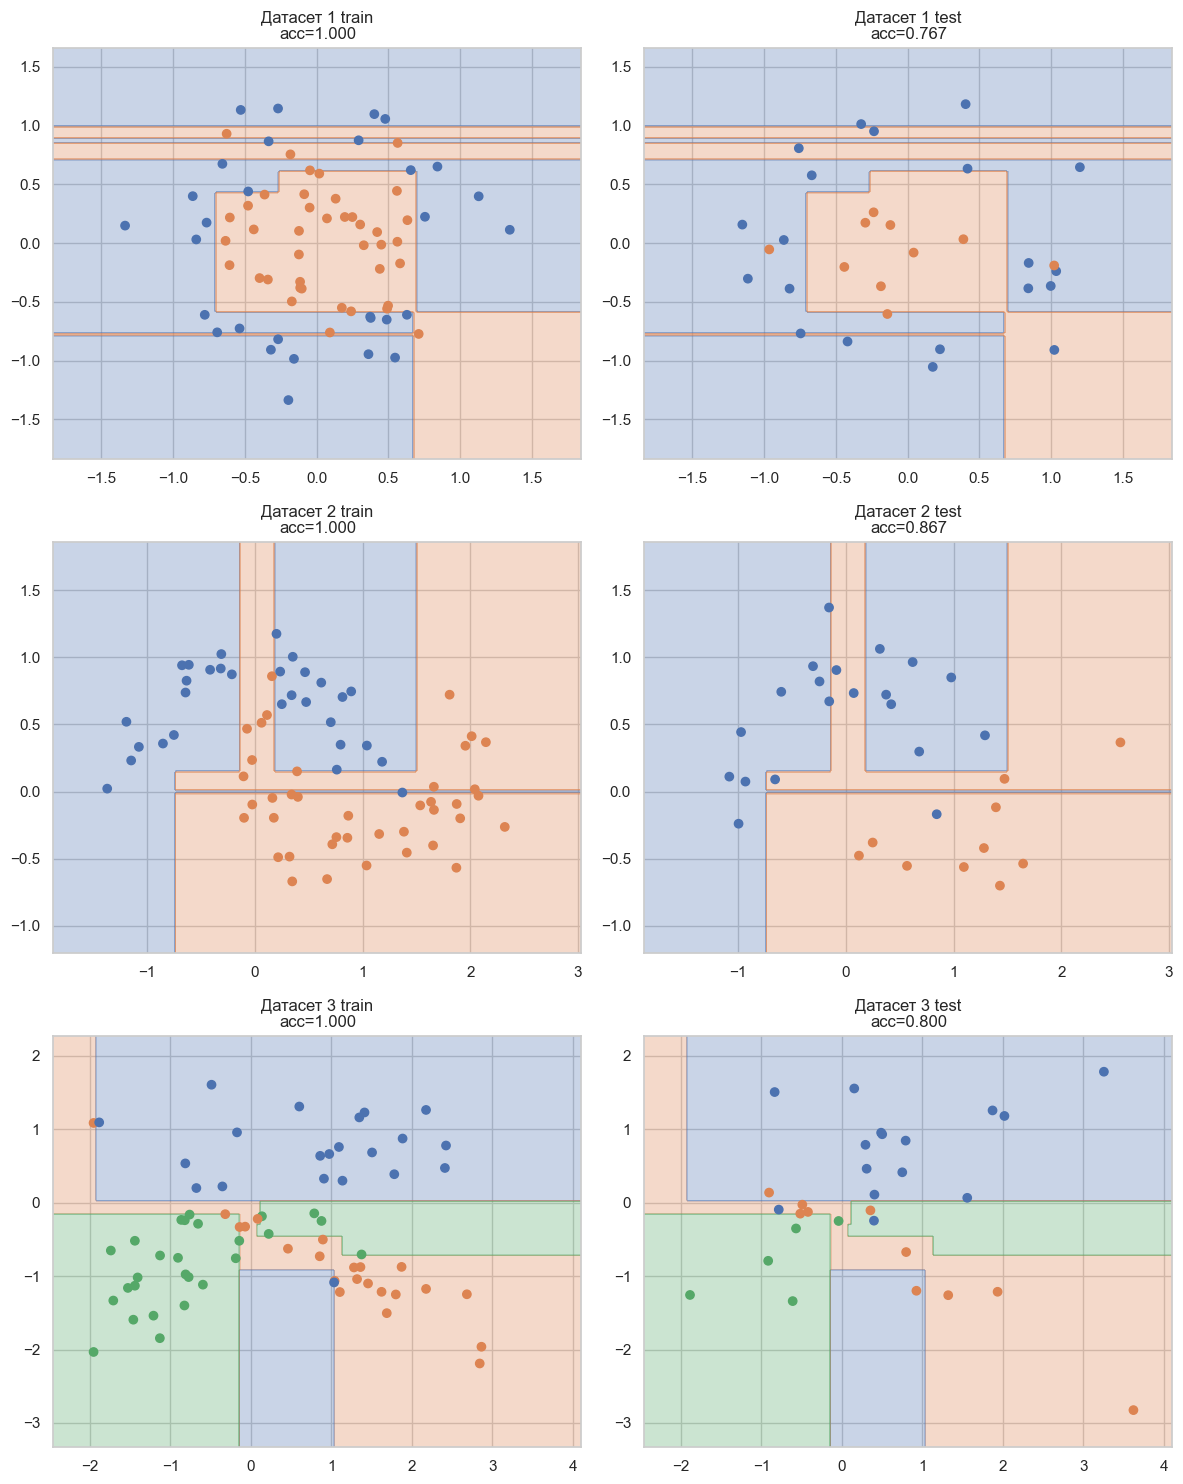

In [41]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for i, (X, y) in enumerate(datasets):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    train_acc = tree.score(X_train, y_train)
    test_acc = tree.score(X_test, y_test)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    
    axes[i, 0].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    axes[i, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    axes[i, 0].set_title(f'Датасет {i+1} train\nacc={train_acc:.3f}')
    
    axes[i, 1].contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    axes[i, 1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap)
    axes[i, 1].set_title(f'Датасет {i+1} test\nacc={test_acc:.3f}')
    
    print(f'Датасет {i+1}: train={train_acc:.3f}, test={test_acc:.3f}, diff={train_acc-test_acc:.3f}')

plt.tight_layout()
plt.show()

__Ответ:__ Да, деревья переобучились. Они запомнили тренировочные данные, но на новых данных ошибаются гораздо чаще

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

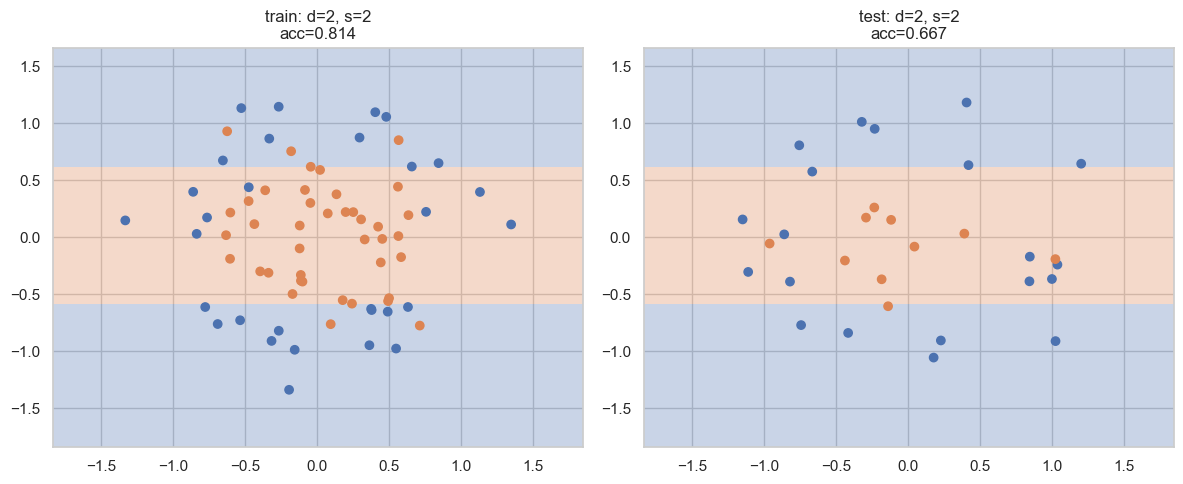

dataset 0, depth=2, min_samples=2
train: 0.814, test: 0.667, diff: 0.148


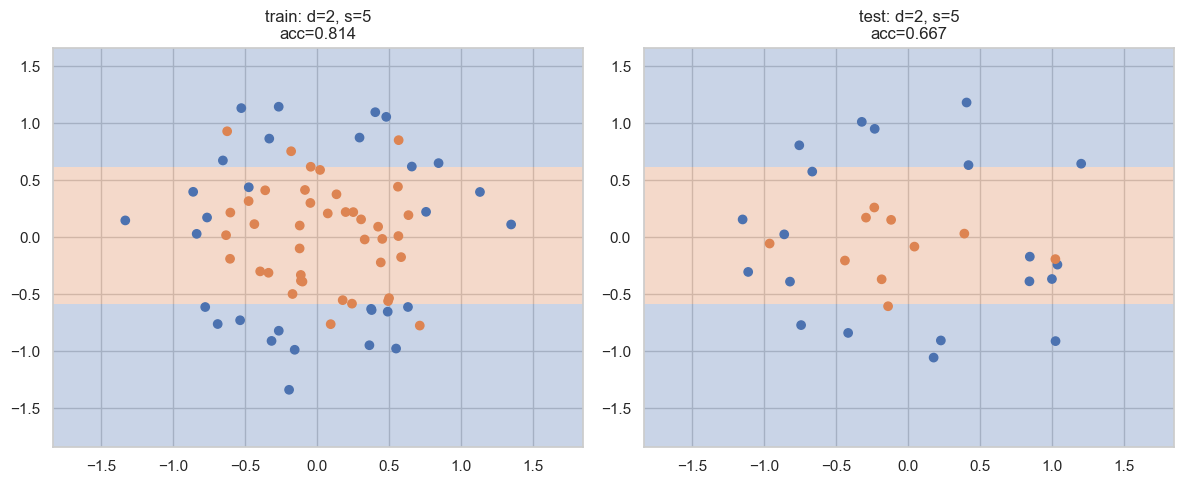

dataset 0, depth=2, min_samples=5
train: 0.814, test: 0.667, diff: 0.148


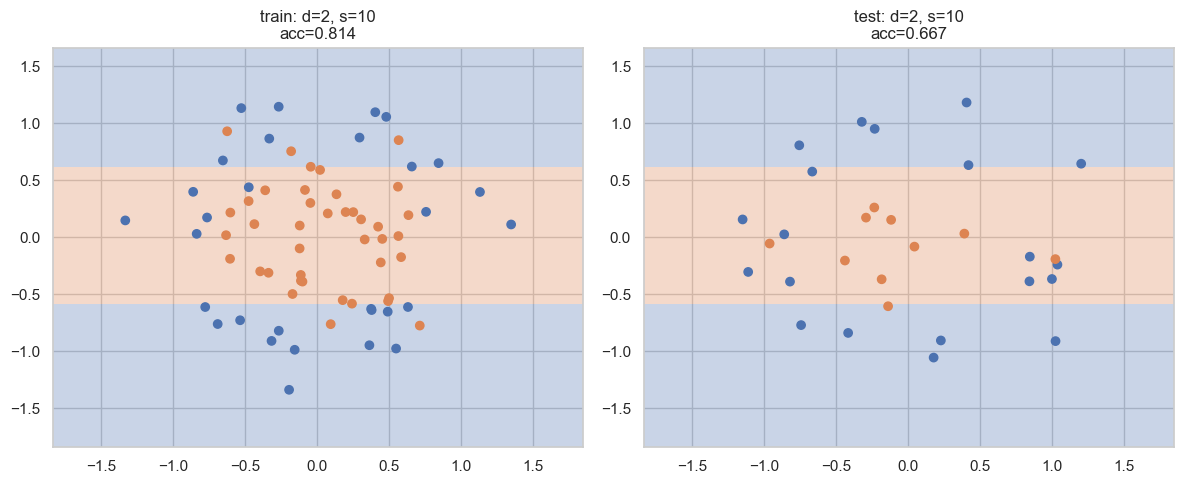

dataset 0, depth=2, min_samples=10
train: 0.814, test: 0.667, diff: 0.148


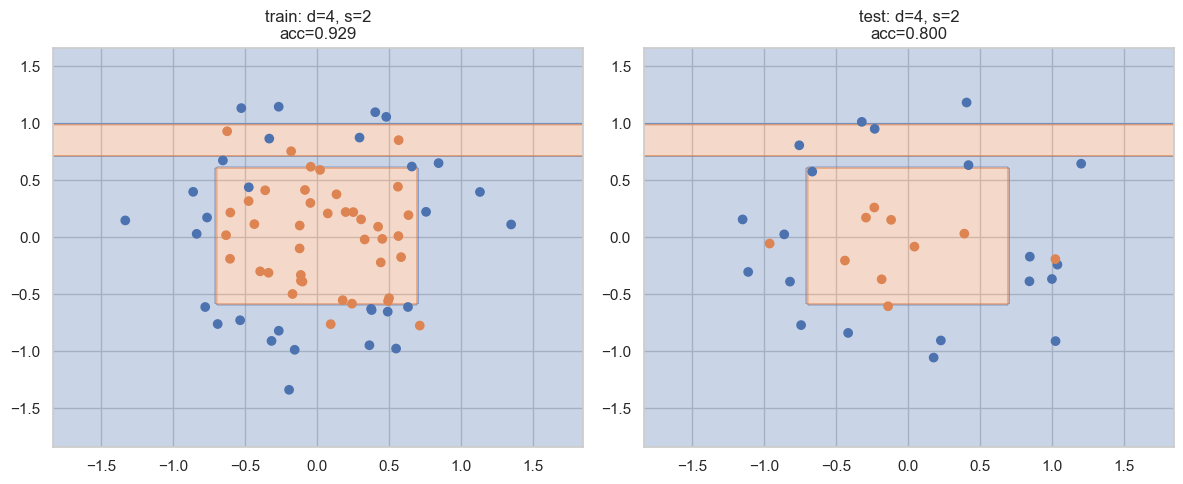

dataset 0, depth=4, min_samples=2
train: 0.929, test: 0.800, diff: 0.129


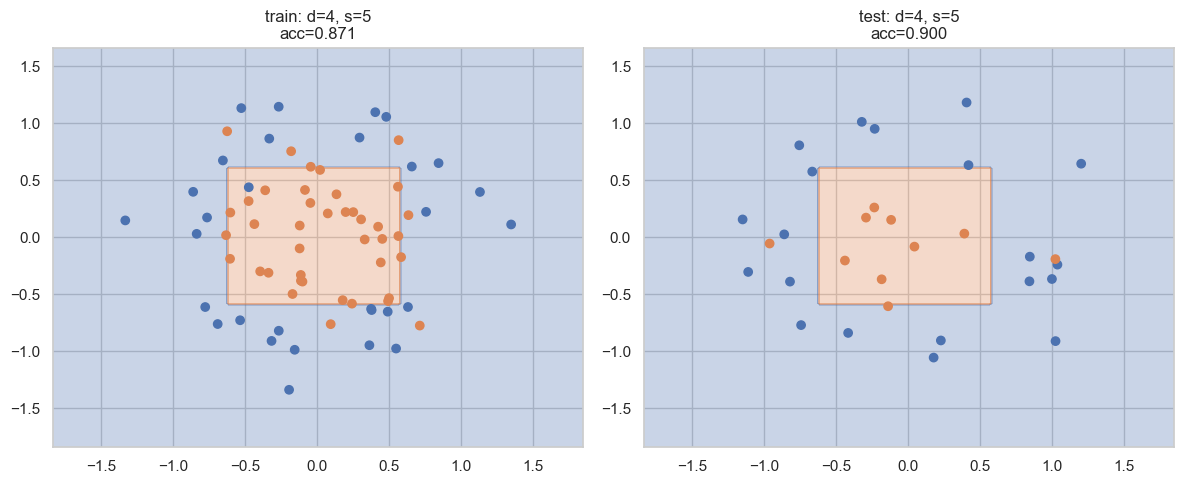

dataset 0, depth=4, min_samples=5
train: 0.871, test: 0.900, diff: -0.029


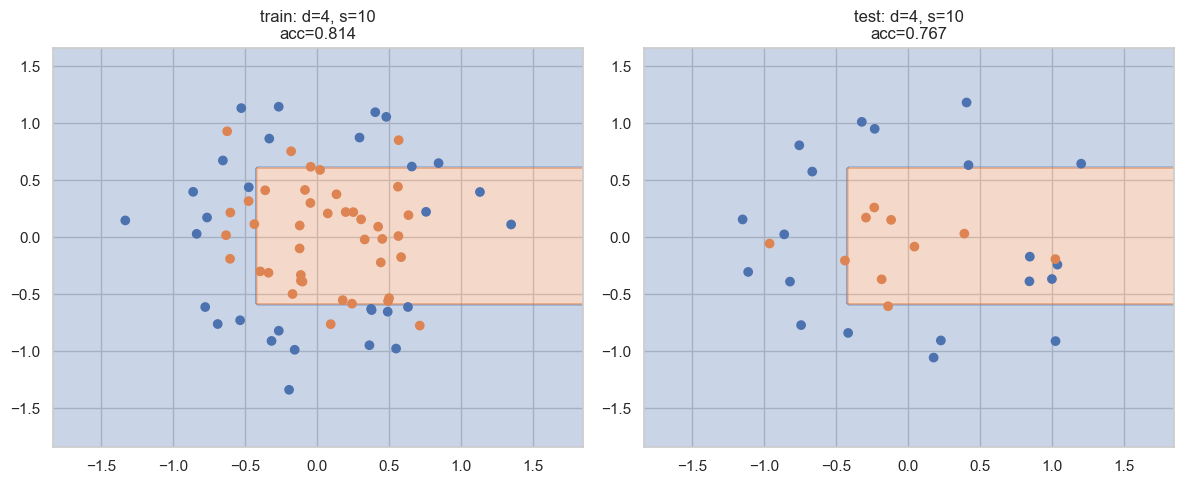

dataset 0, depth=4, min_samples=10
train: 0.814, test: 0.767, diff: 0.048


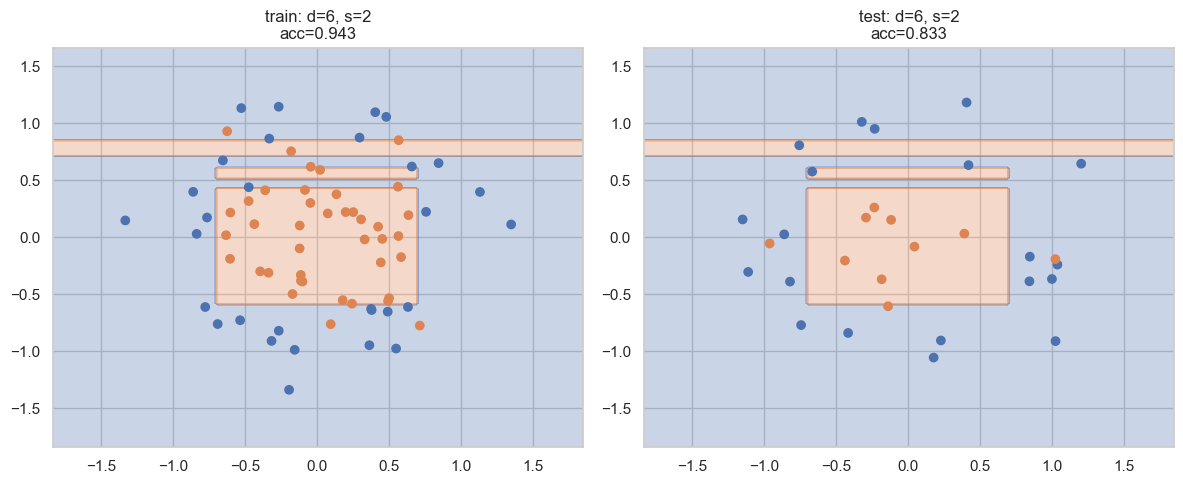

dataset 0, depth=6, min_samples=2
train: 0.943, test: 0.833, diff: 0.110


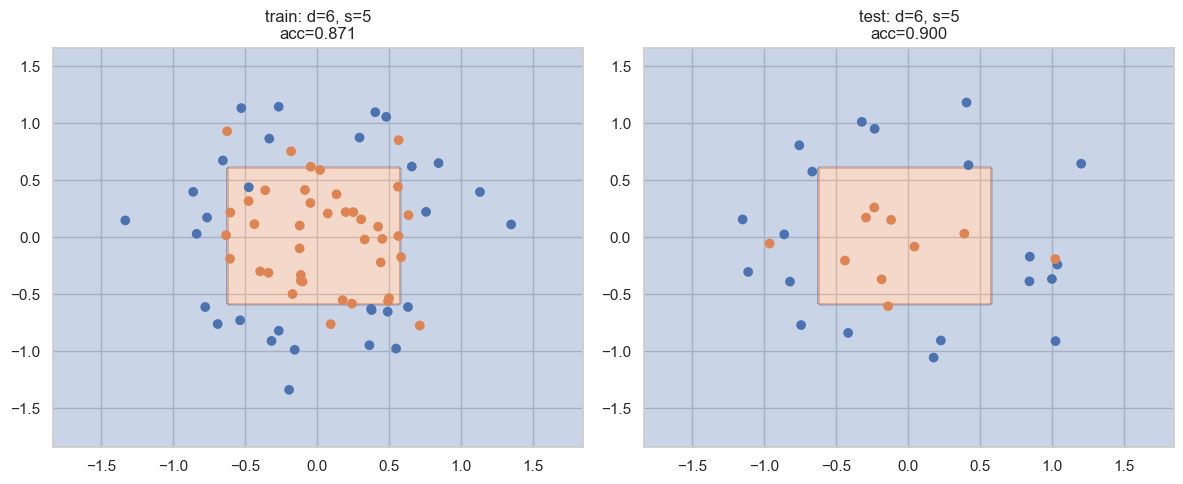

dataset 0, depth=6, min_samples=5
train: 0.871, test: 0.900, diff: -0.029


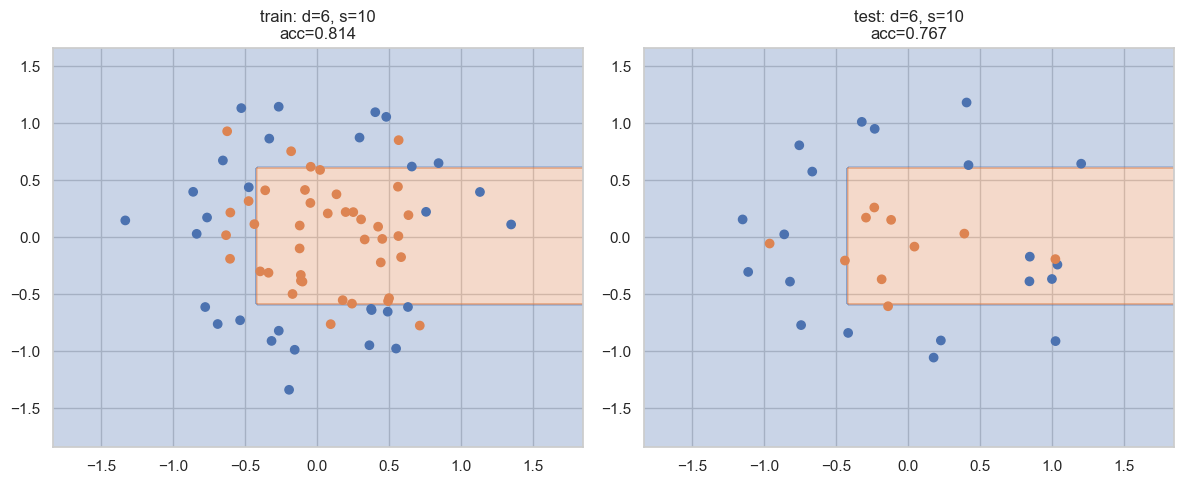

dataset 0, depth=6, min_samples=10
train: 0.814, test: 0.767, diff: 0.048


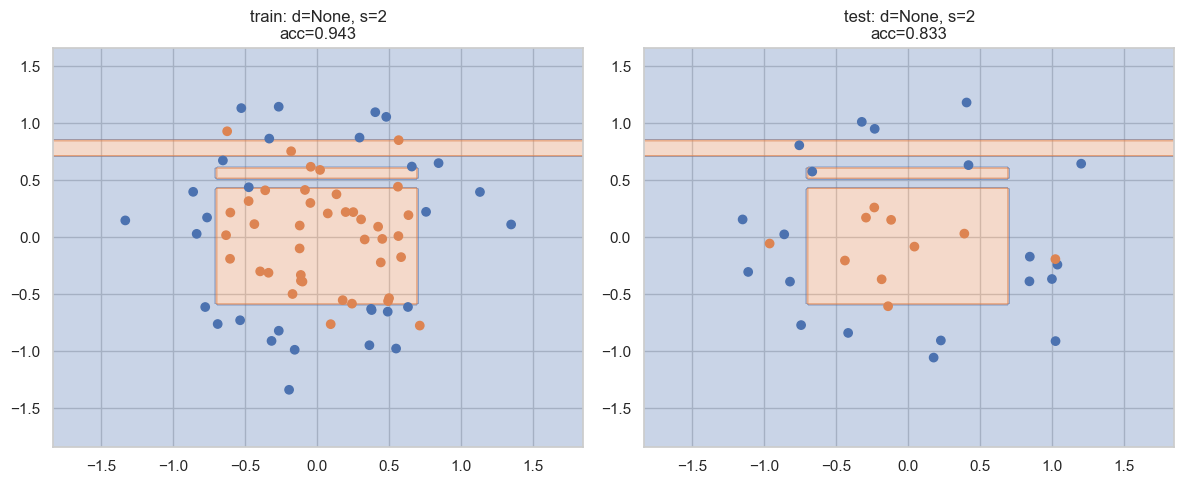

dataset 0, depth=None, min_samples=2
train: 0.943, test: 0.833, diff: 0.110


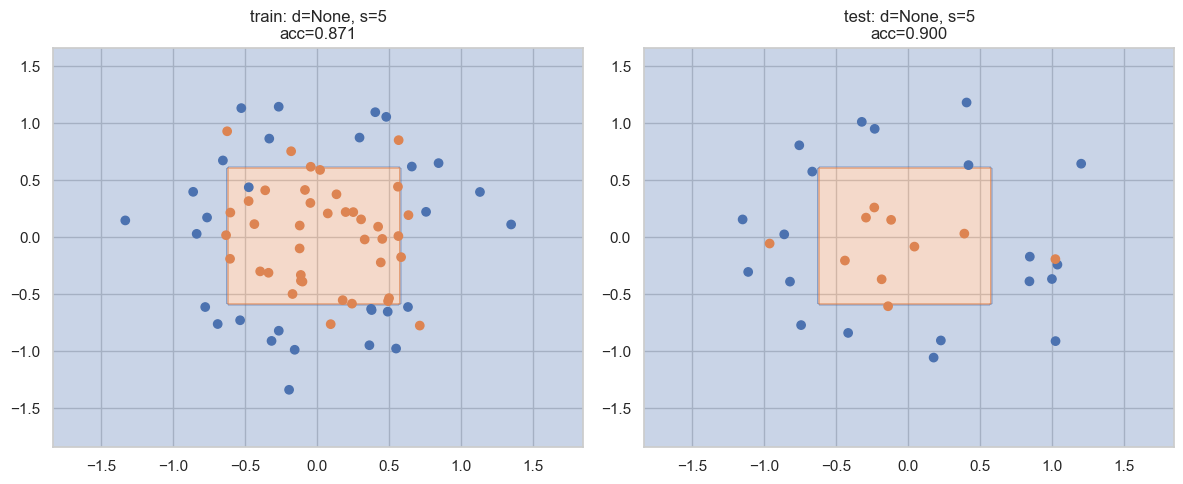

dataset 0, depth=None, min_samples=5
train: 0.871, test: 0.900, diff: -0.029


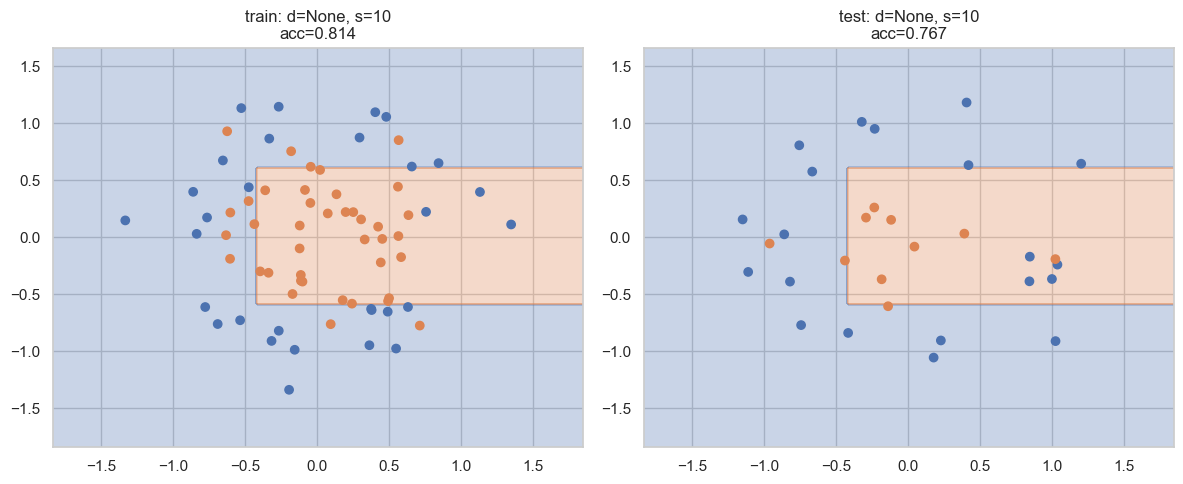

dataset 0, depth=None, min_samples=10
train: 0.814, test: 0.767, diff: 0.048


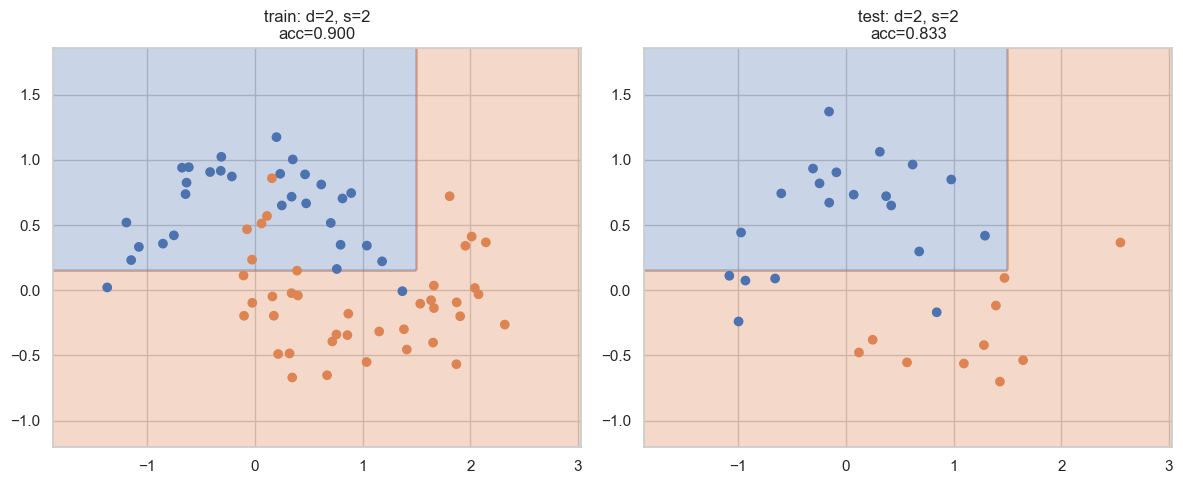

dataset 1, depth=2, min_samples=2
train: 0.900, test: 0.833, diff: 0.067


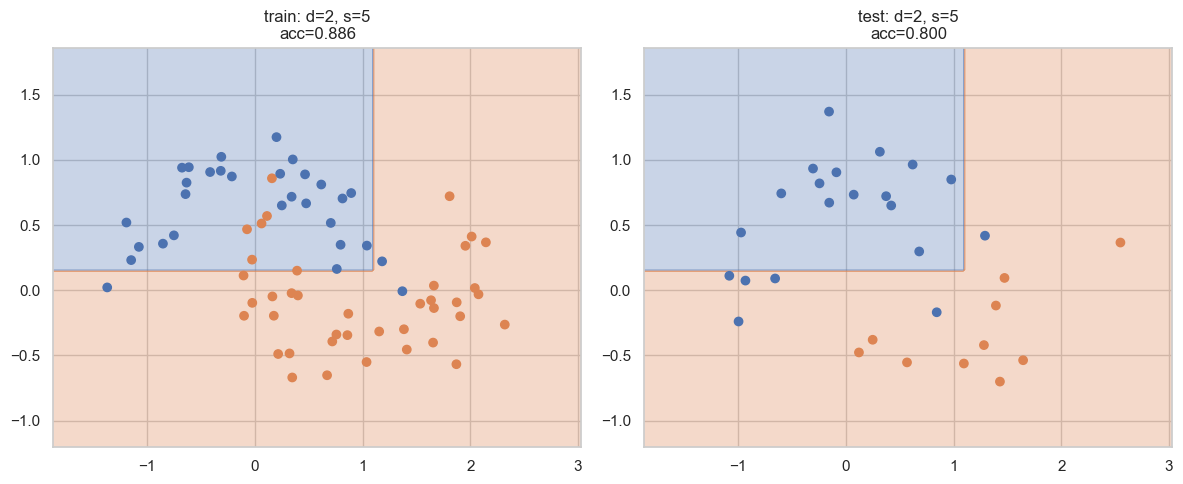

dataset 1, depth=2, min_samples=5
train: 0.886, test: 0.800, diff: 0.086


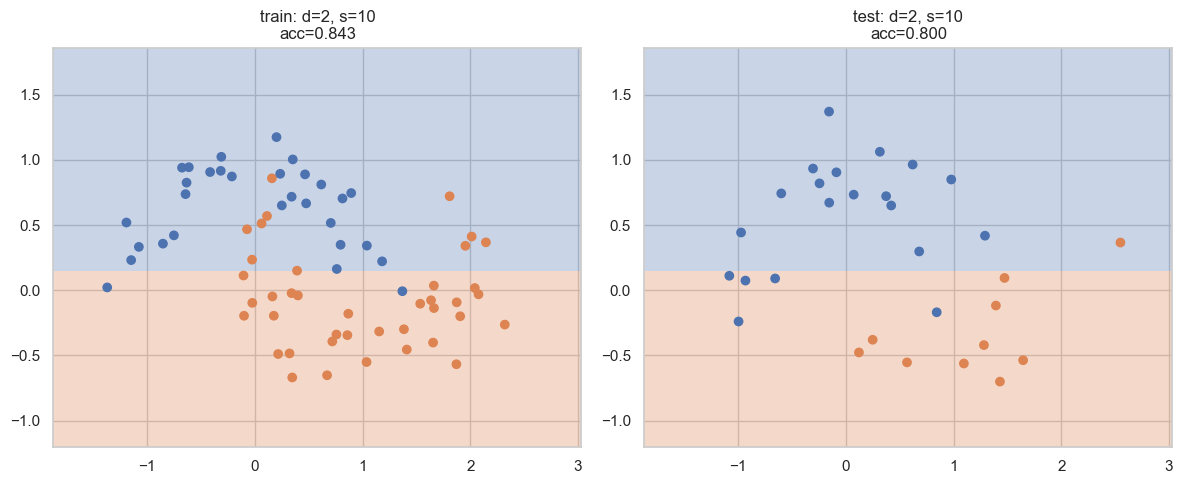

dataset 1, depth=2, min_samples=10
train: 0.843, test: 0.800, diff: 0.043


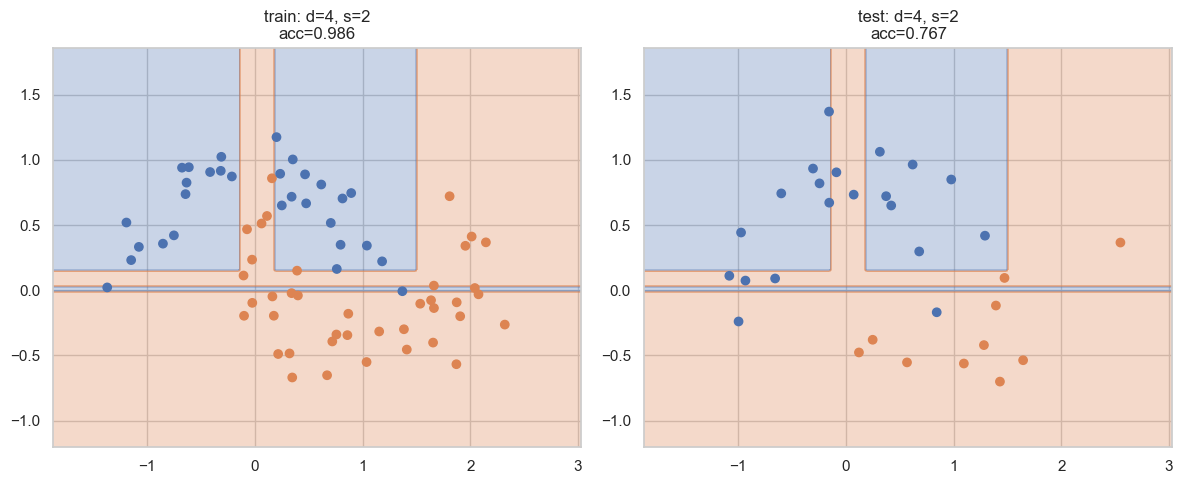

dataset 1, depth=4, min_samples=2
train: 0.986, test: 0.767, diff: 0.219


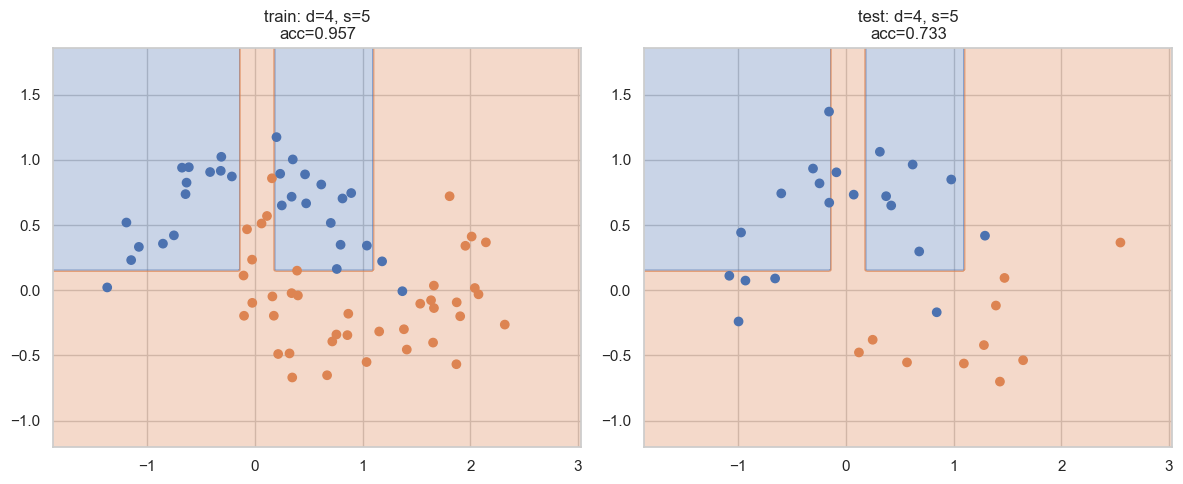

dataset 1, depth=4, min_samples=5
train: 0.957, test: 0.733, diff: 0.224


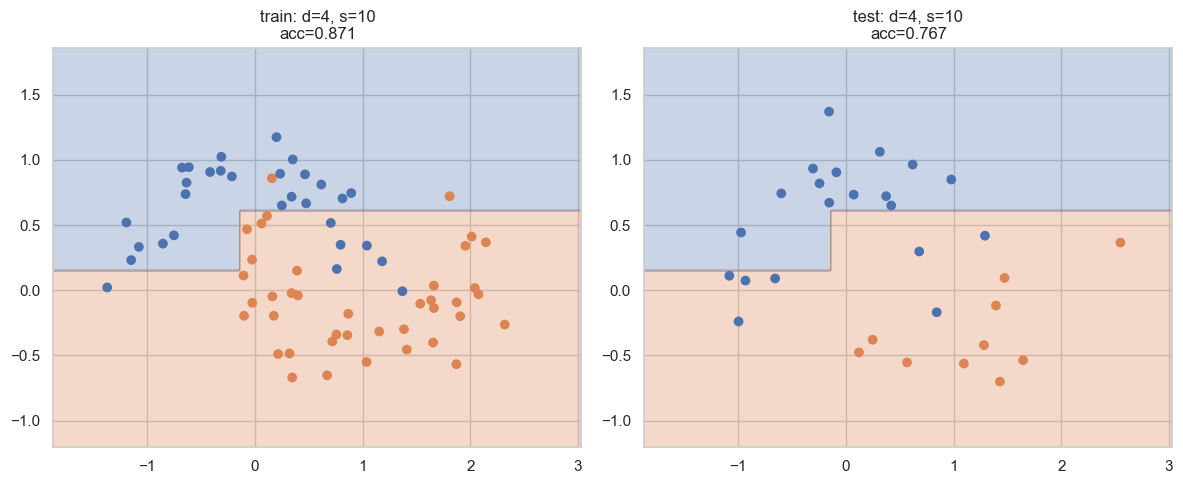

dataset 1, depth=4, min_samples=10
train: 0.871, test: 0.767, diff: 0.105


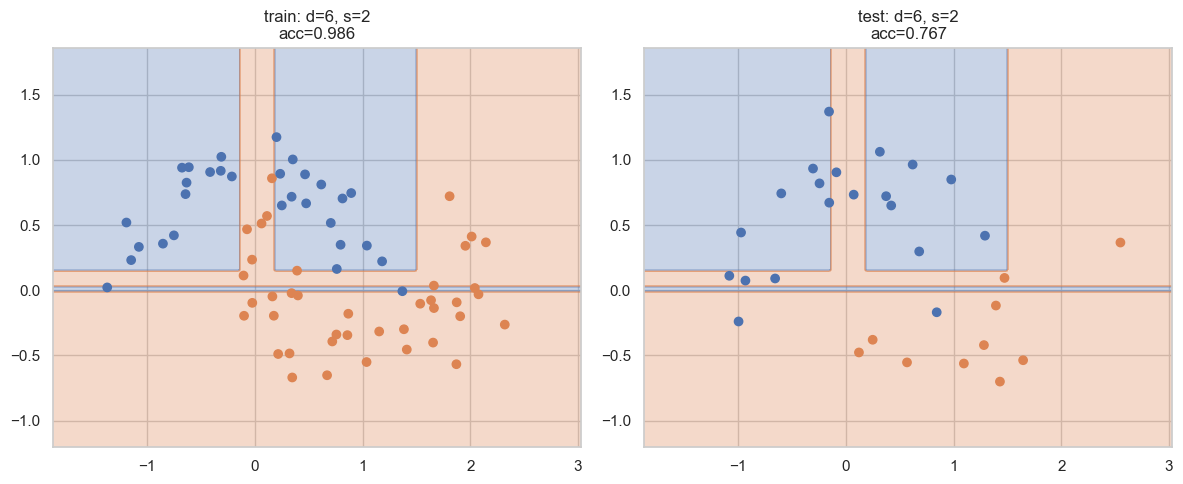

dataset 1, depth=6, min_samples=2
train: 0.986, test: 0.767, diff: 0.219


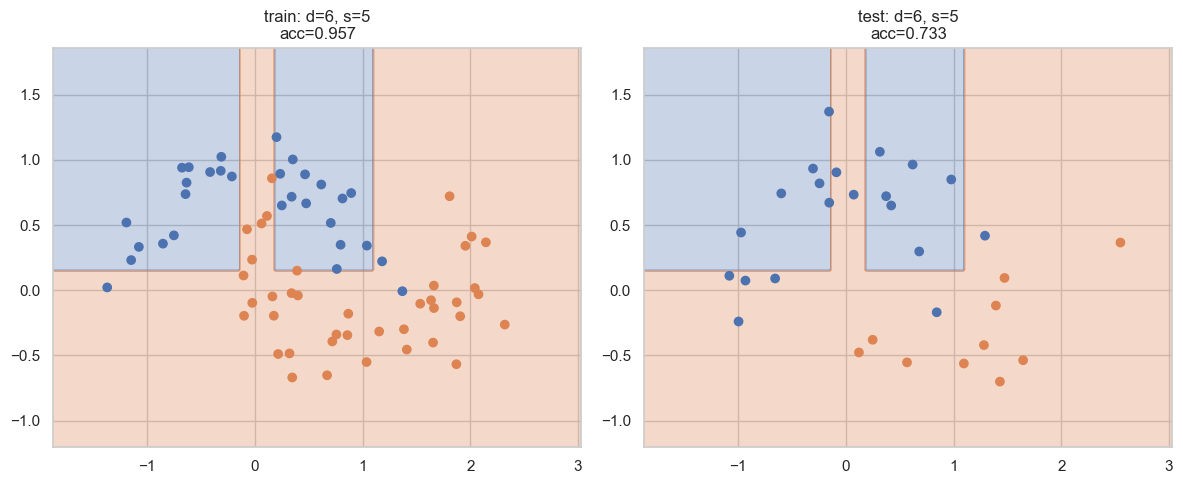

dataset 1, depth=6, min_samples=5
train: 0.957, test: 0.733, diff: 0.224


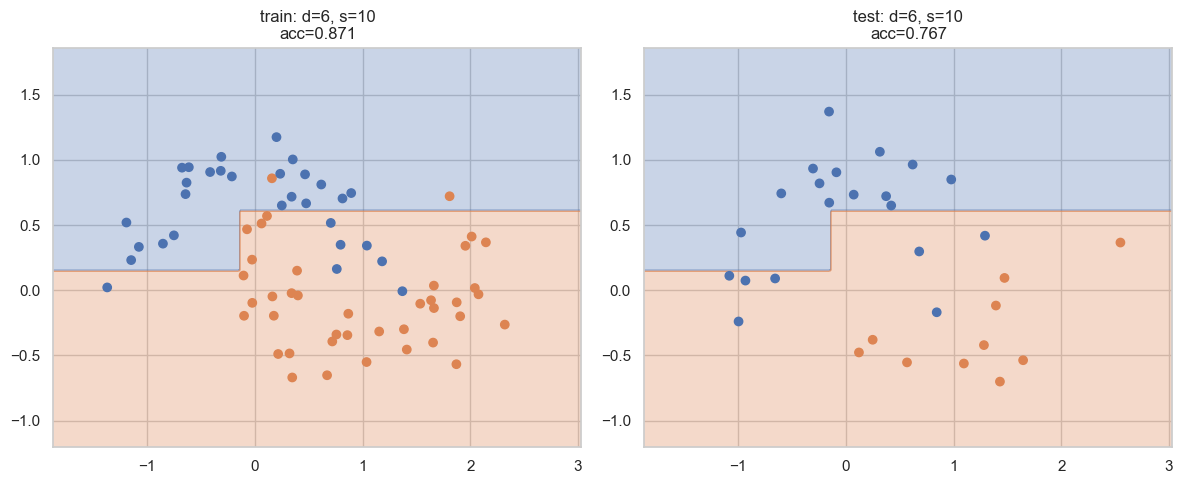

dataset 1, depth=6, min_samples=10
train: 0.871, test: 0.767, diff: 0.105


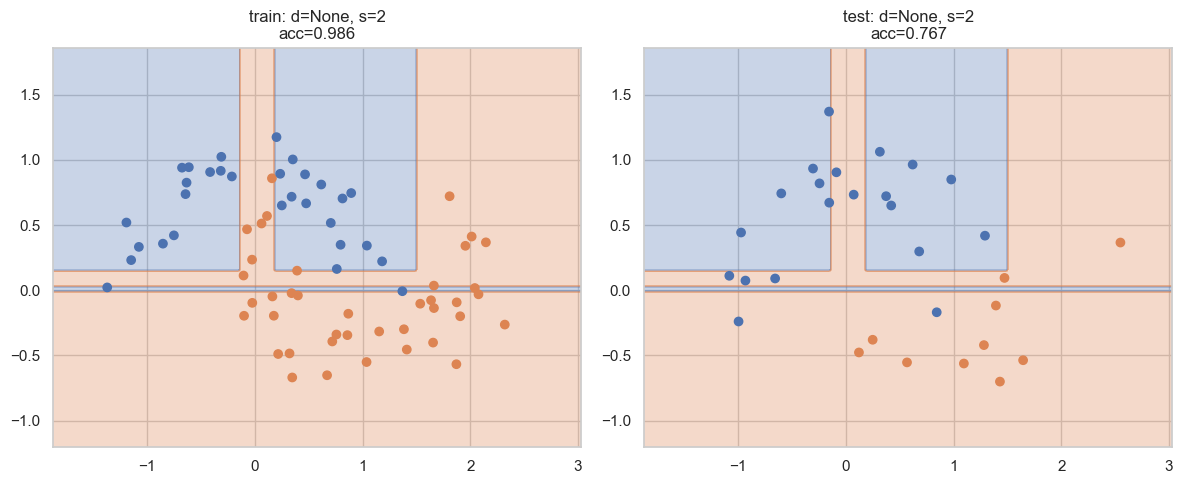

dataset 1, depth=None, min_samples=2
train: 0.986, test: 0.767, diff: 0.219


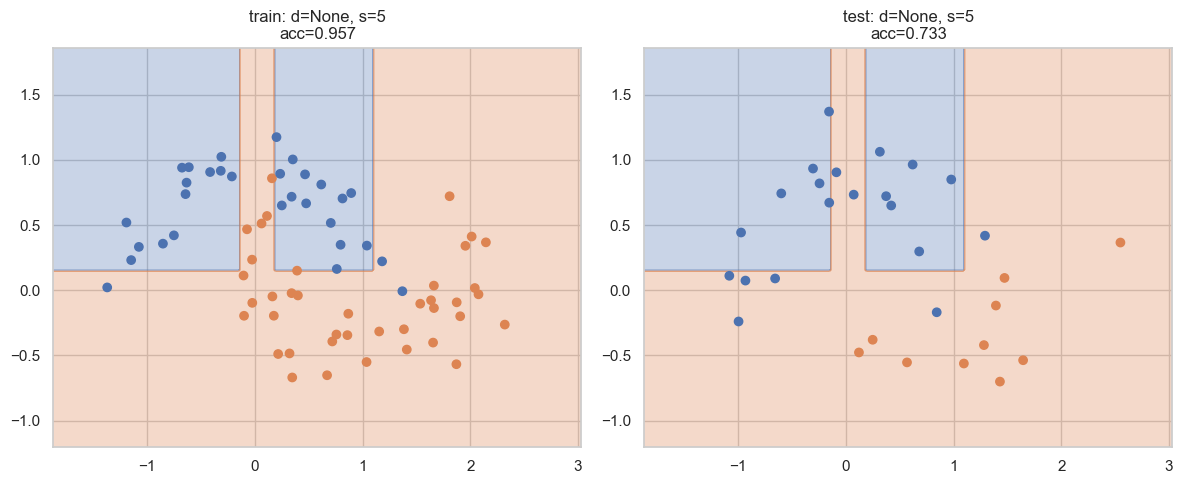

dataset 1, depth=None, min_samples=5
train: 0.957, test: 0.733, diff: 0.224


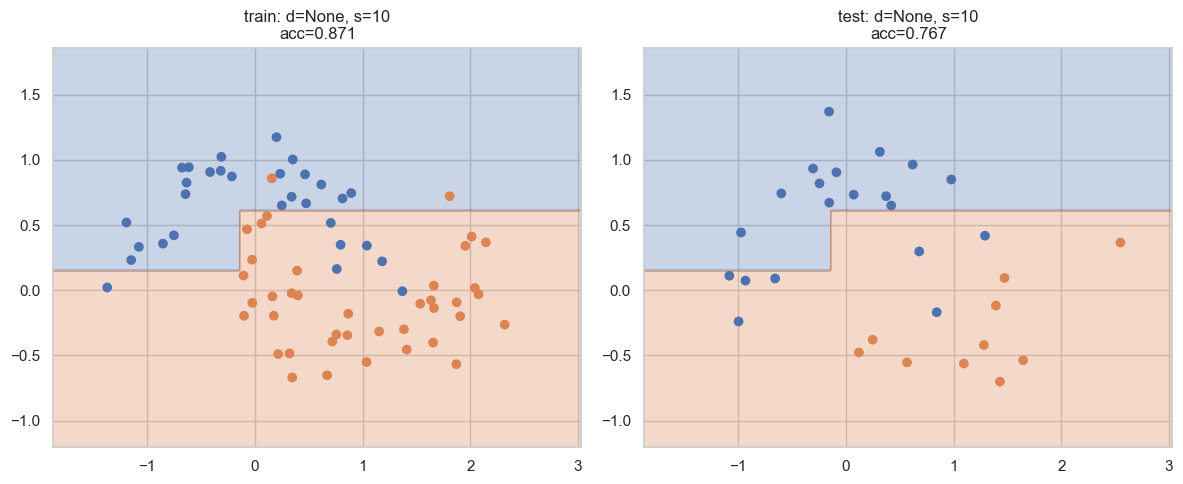

dataset 1, depth=None, min_samples=10
train: 0.871, test: 0.767, diff: 0.105


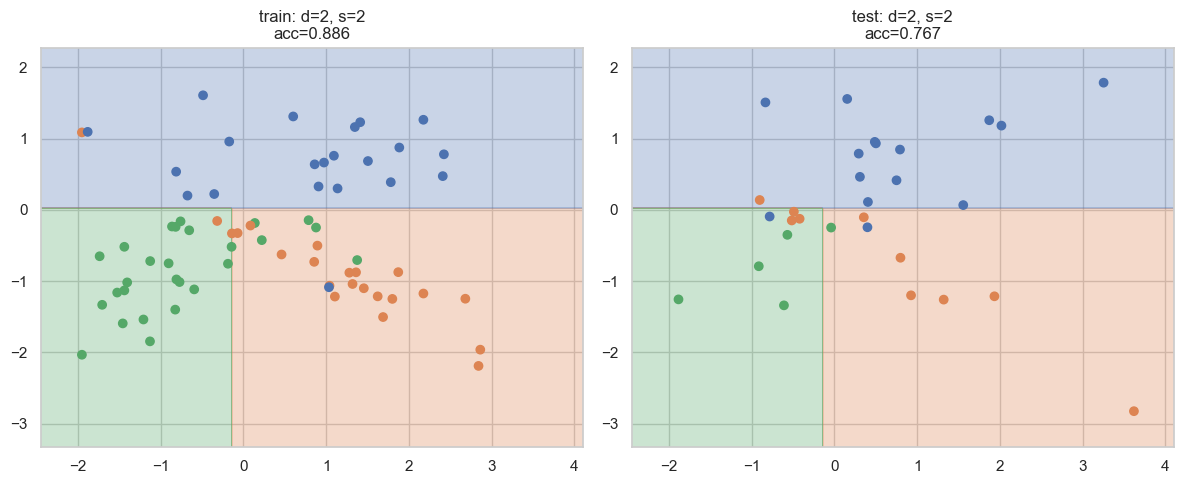

dataset 2, depth=2, min_samples=2
train: 0.886, test: 0.767, diff: 0.119


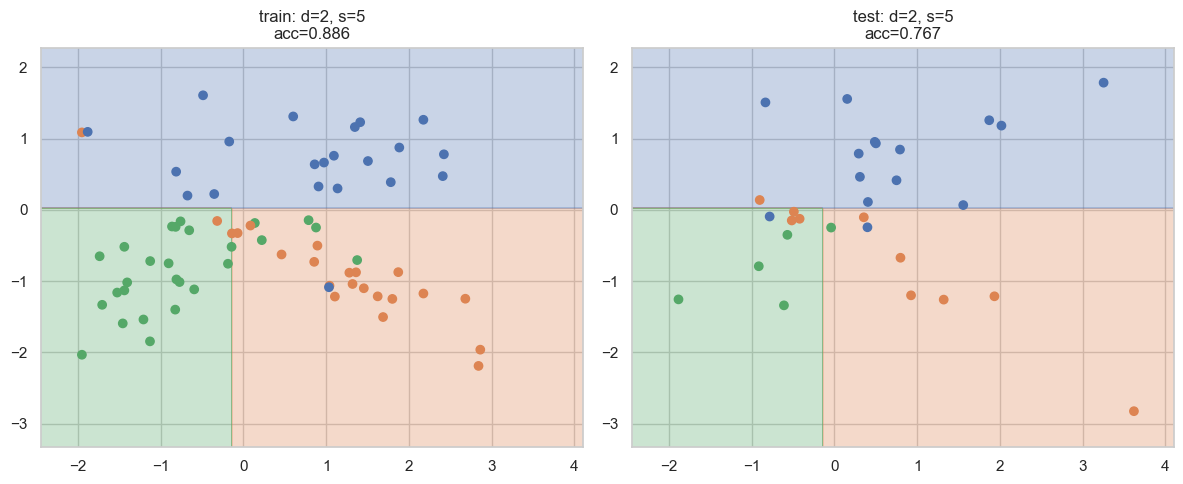

dataset 2, depth=2, min_samples=5
train: 0.886, test: 0.767, diff: 0.119


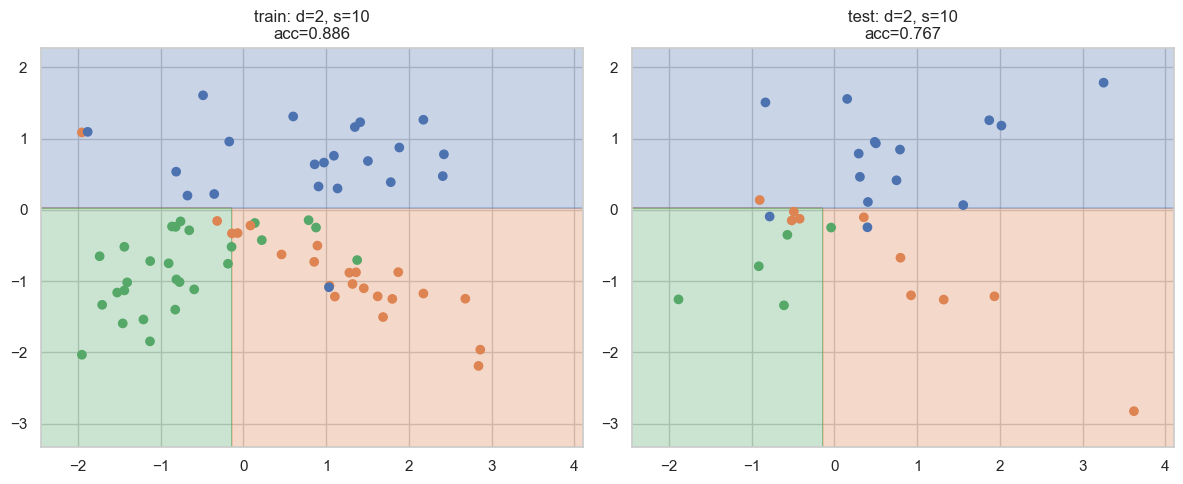

dataset 2, depth=2, min_samples=10
train: 0.886, test: 0.767, diff: 0.119


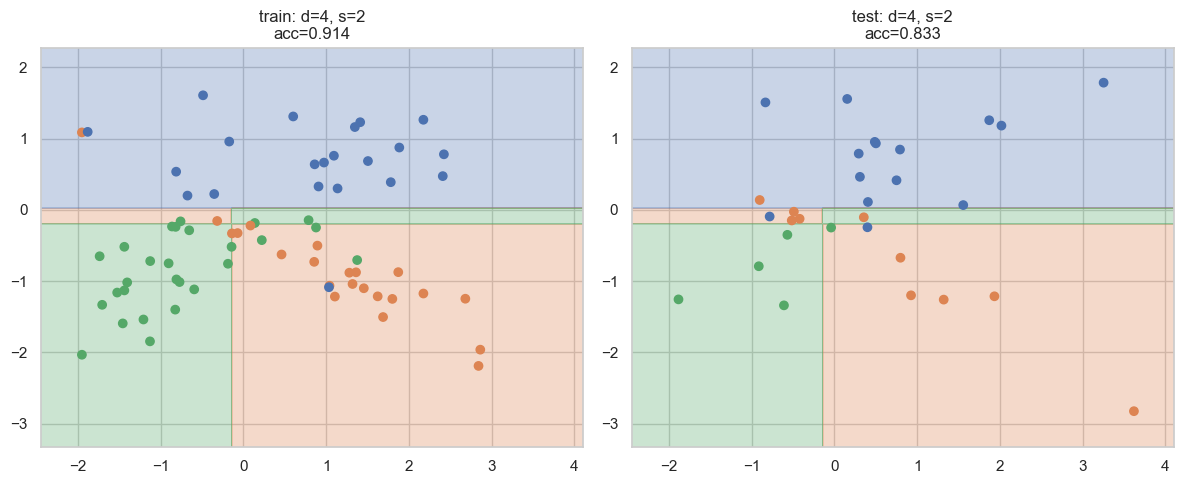

dataset 2, depth=4, min_samples=2
train: 0.914, test: 0.833, diff: 0.081


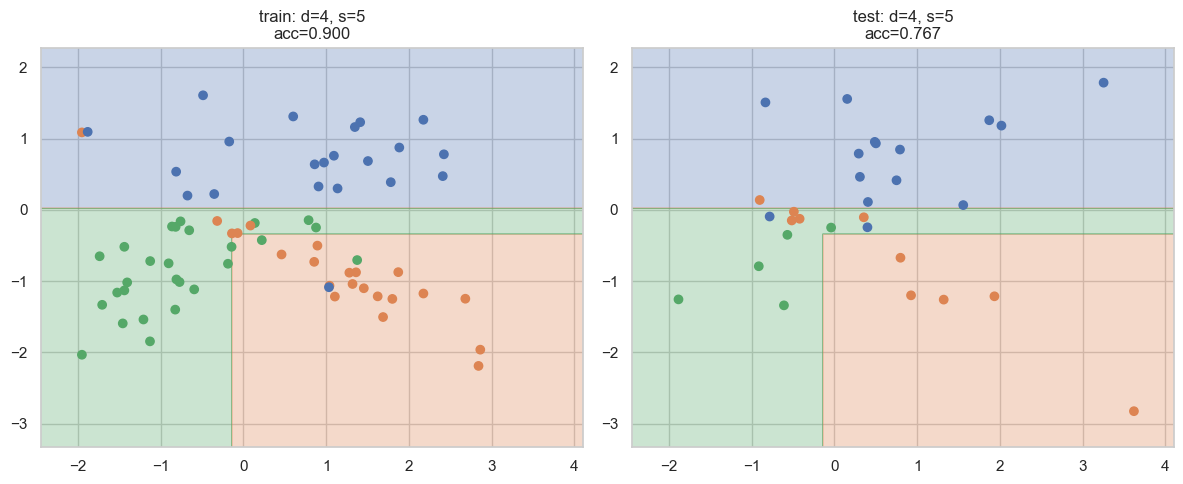

dataset 2, depth=4, min_samples=5
train: 0.900, test: 0.767, diff: 0.133


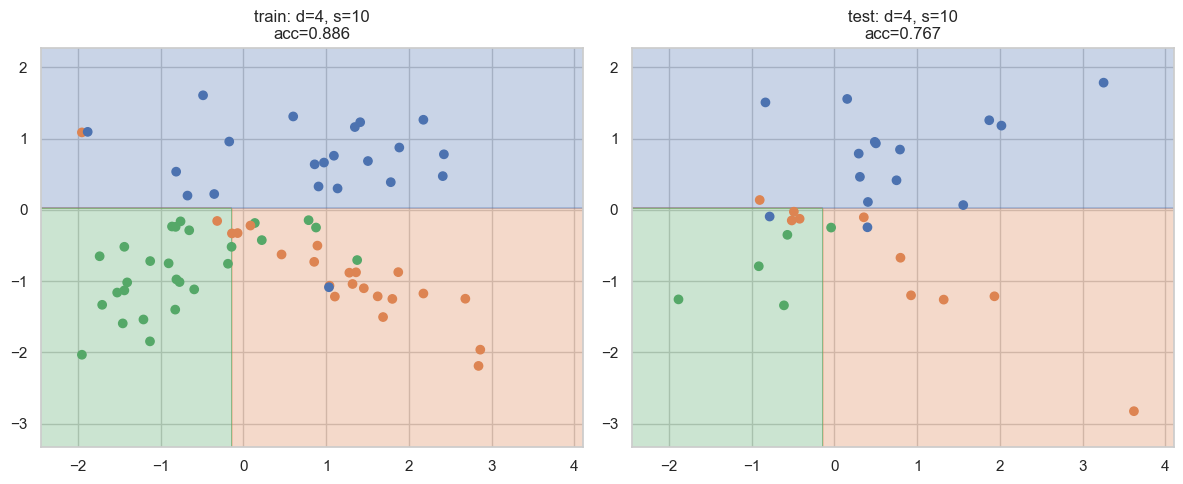

dataset 2, depth=4, min_samples=10
train: 0.886, test: 0.767, diff: 0.119


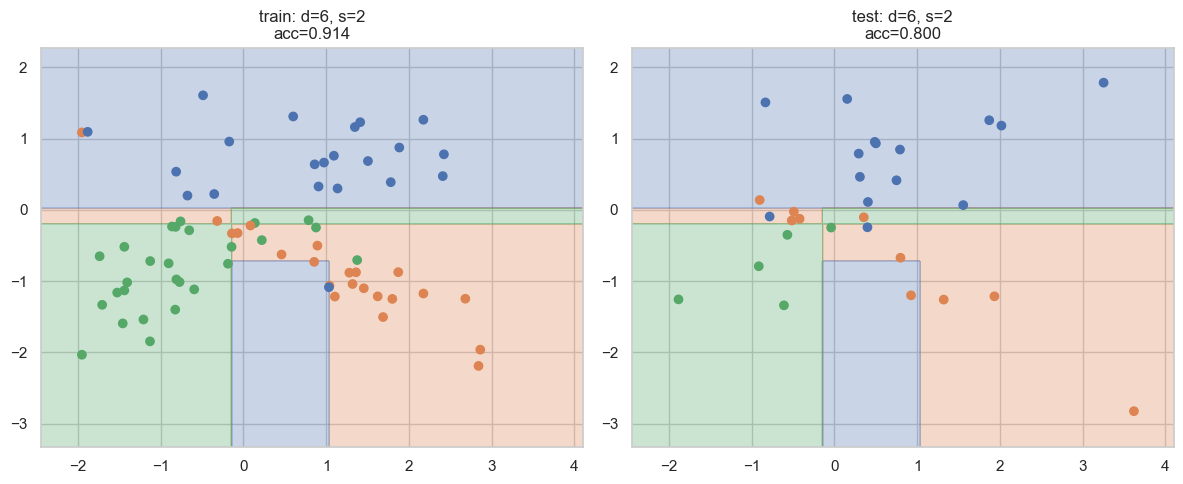

dataset 2, depth=6, min_samples=2
train: 0.914, test: 0.800, diff: 0.114


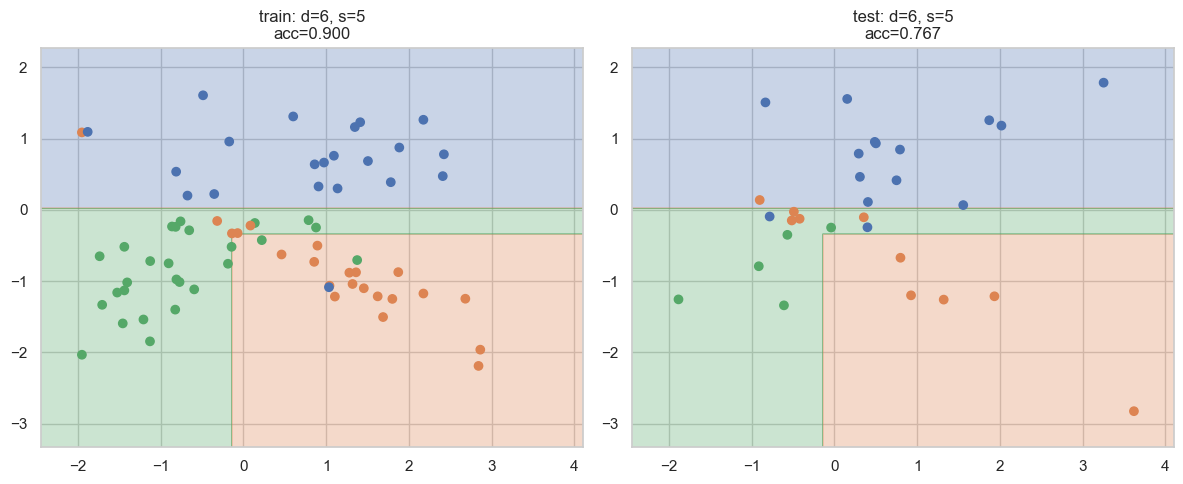

dataset 2, depth=6, min_samples=5
train: 0.900, test: 0.767, diff: 0.133


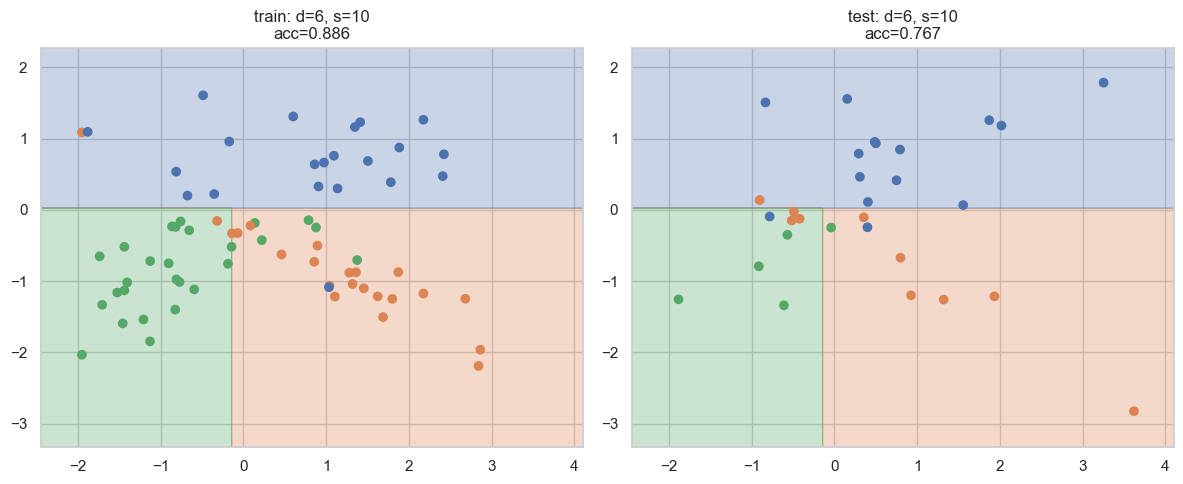

dataset 2, depth=6, min_samples=10
train: 0.886, test: 0.767, diff: 0.119


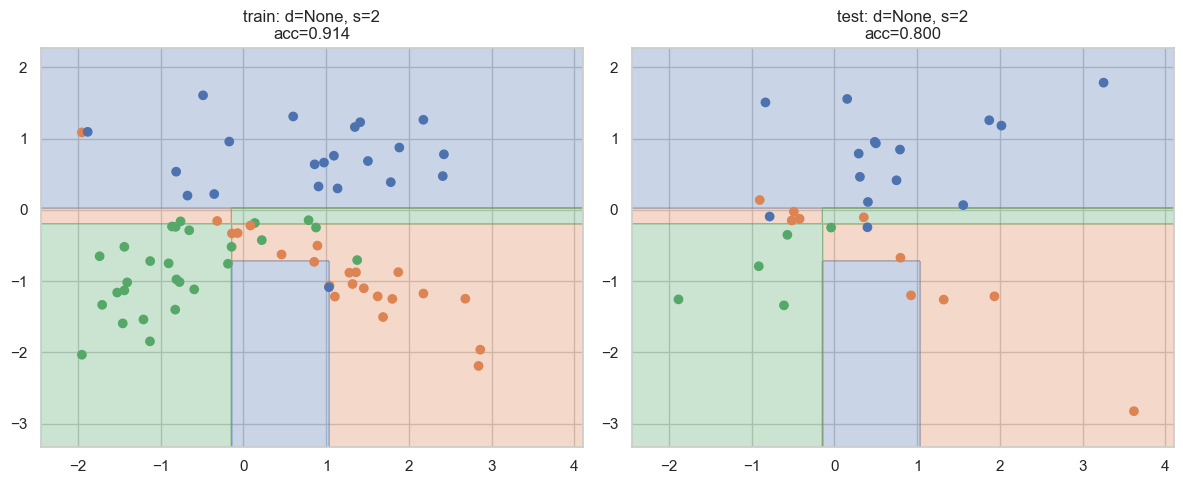

dataset 2, depth=None, min_samples=2
train: 0.914, test: 0.800, diff: 0.114


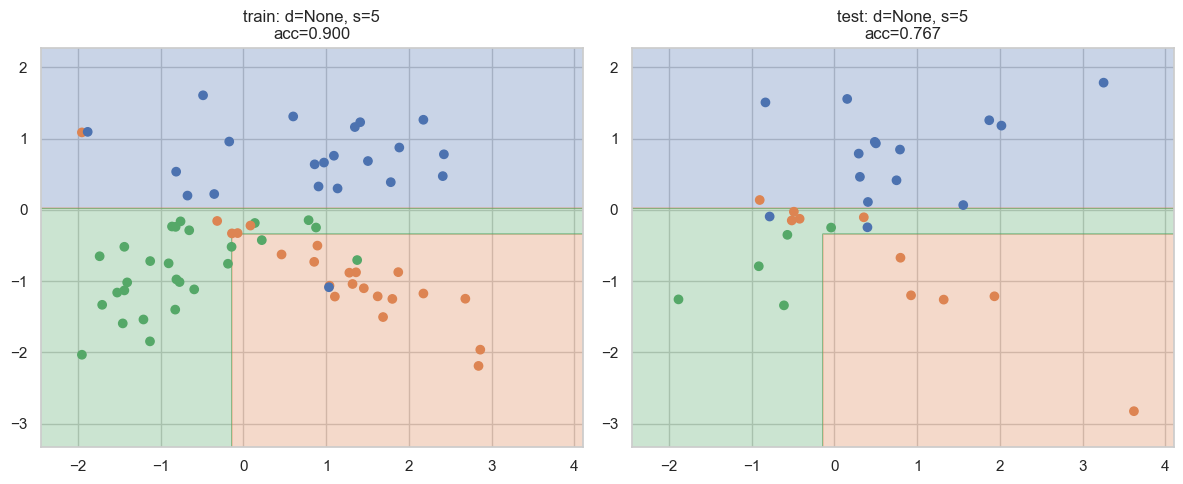

dataset 2, depth=None, min_samples=5
train: 0.900, test: 0.767, diff: 0.133


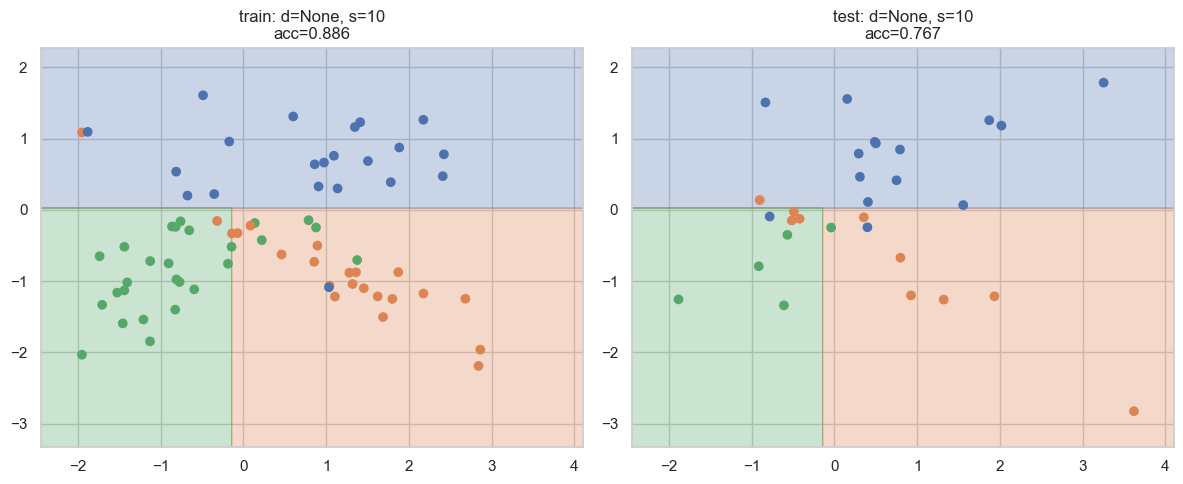

dataset 2, depth=None, min_samples=10
train: 0.886, test: 0.767, diff: 0.119


In [42]:
max_depth_options = [2, 4, 6, None]
min_samples_options = [2, 5, 10]

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for depth in max_depth_options:
        for samples in min_samples_options:
            dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples, random_state=21)
            dt.fit(X_train, y_train)

            train_score = dt.score(X_train, y_train)
            test_score = dt.score(X_test, y_test)
            
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
            
            Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            palette = sns.color_palette(n_colors=len(np.unique(y)))
            cmap = ListedColormap(palette)
            
            ax1.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
            ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
            ax1.set_title(f'train: d={depth}, s={samples}\nacc={train_score:.3f}')
            
            ax2.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
            ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap)
            ax2.set_title(f'test: d={depth}, s={samples}\nacc={test_score:.3f}')
            
            plt.tight_layout()
            plt.show()
            
            print(f'dataset {i}, depth={depth}, min_samples={samples}')
            print(f'train: {train_score:.3f}, test: {test_score:.3f}, diff: {train_score-test_score:.3f}')

__Ответ:__ Лучше всего работают max_depth = None или 5 с min_samples_leaf = 3. При ограничении глубины поверхность более гладкая. Экстремальные значения min_samples_leaf хуже средних. Все датасеты ведут себя похоже

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

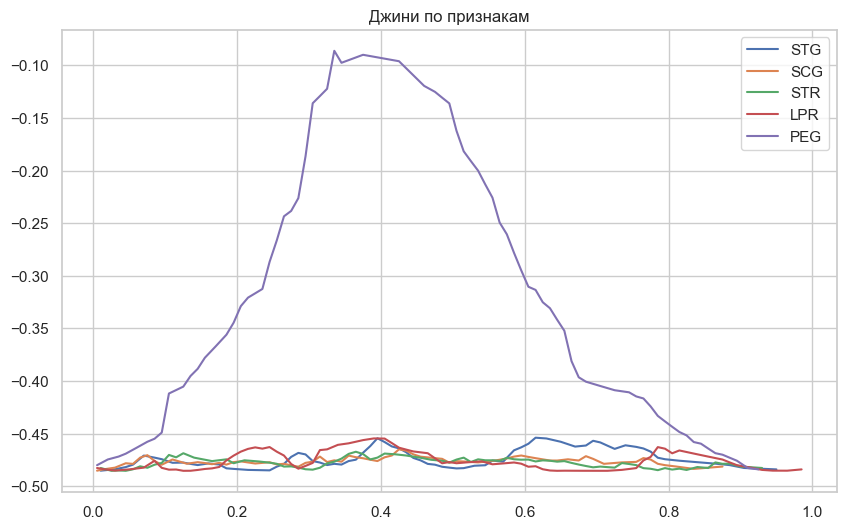

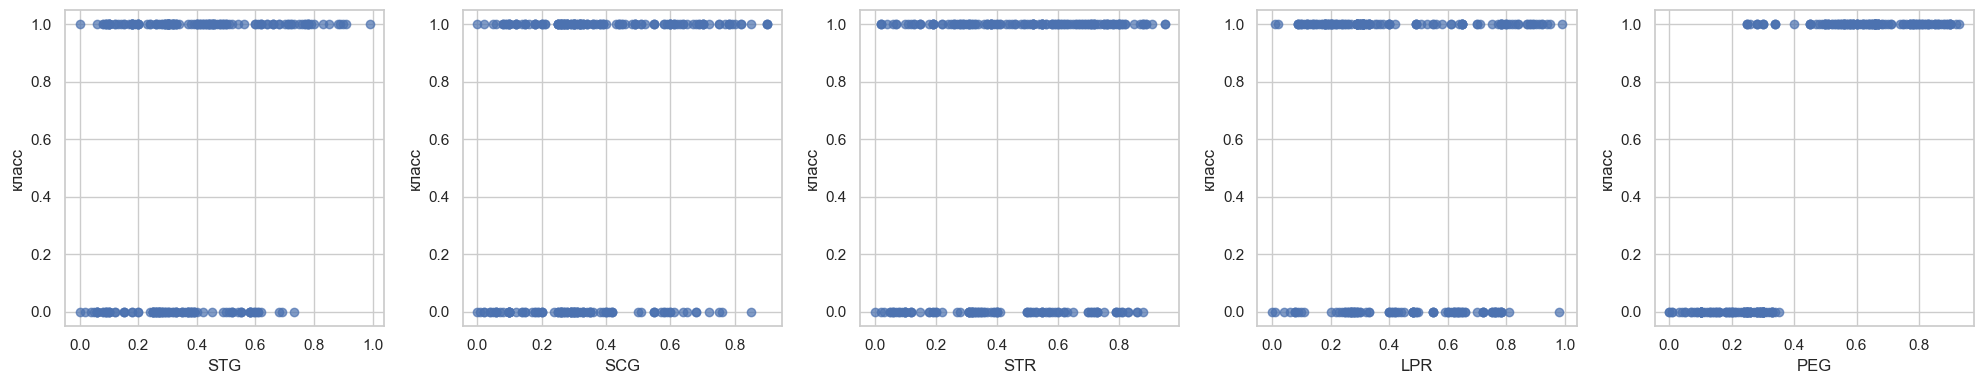

In [43]:
from hw2code import find_best_split

data = pd.read_csv('datasets/students.csv')

y = data['UNS']
X = data.drop('UNS', axis=1)

plt.figure(figsize=(10, 6))

for col in X.columns:
    feature = X[col]
    thrs, ginis, best_thr, best_gini = find_best_split(feature, y)
    plt.plot(thrs, ginis, label=col)

plt.title('Джини по признакам')
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('класс')

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По графикам критерия Джини видно, что только признак PEG позволяет разделить выборку эффективно — кривая имеет ярко выраженный минимум. Остальные признаки показывют хаотичные колебания без чётких минимумов, что говорит об их низкой разделяющей способности

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree, find_best_split

mushrooms = pd.read_csv('datasets/agaricus-lepiota.data')
encoders = []
changed = mushrooms.copy()

for col in mushrooms.columns:
    encoder = LabelEncoder()
    encoders.append(encoder)
    changed[col] = encoder.fit_transform(mushrooms[col])

X = changed.iloc[:, 1:]
y = changed.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

tree = DecisionTree(['categorical'] * X.shape[1])
tree.fit(X_train.values, y_train.values)

y_pred = tree.predict(X_test.values)
acc = accuracy_score(y_test, y_pred)

print(f'accuracy: {acc:.4f}')

accuracy: 1.0000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

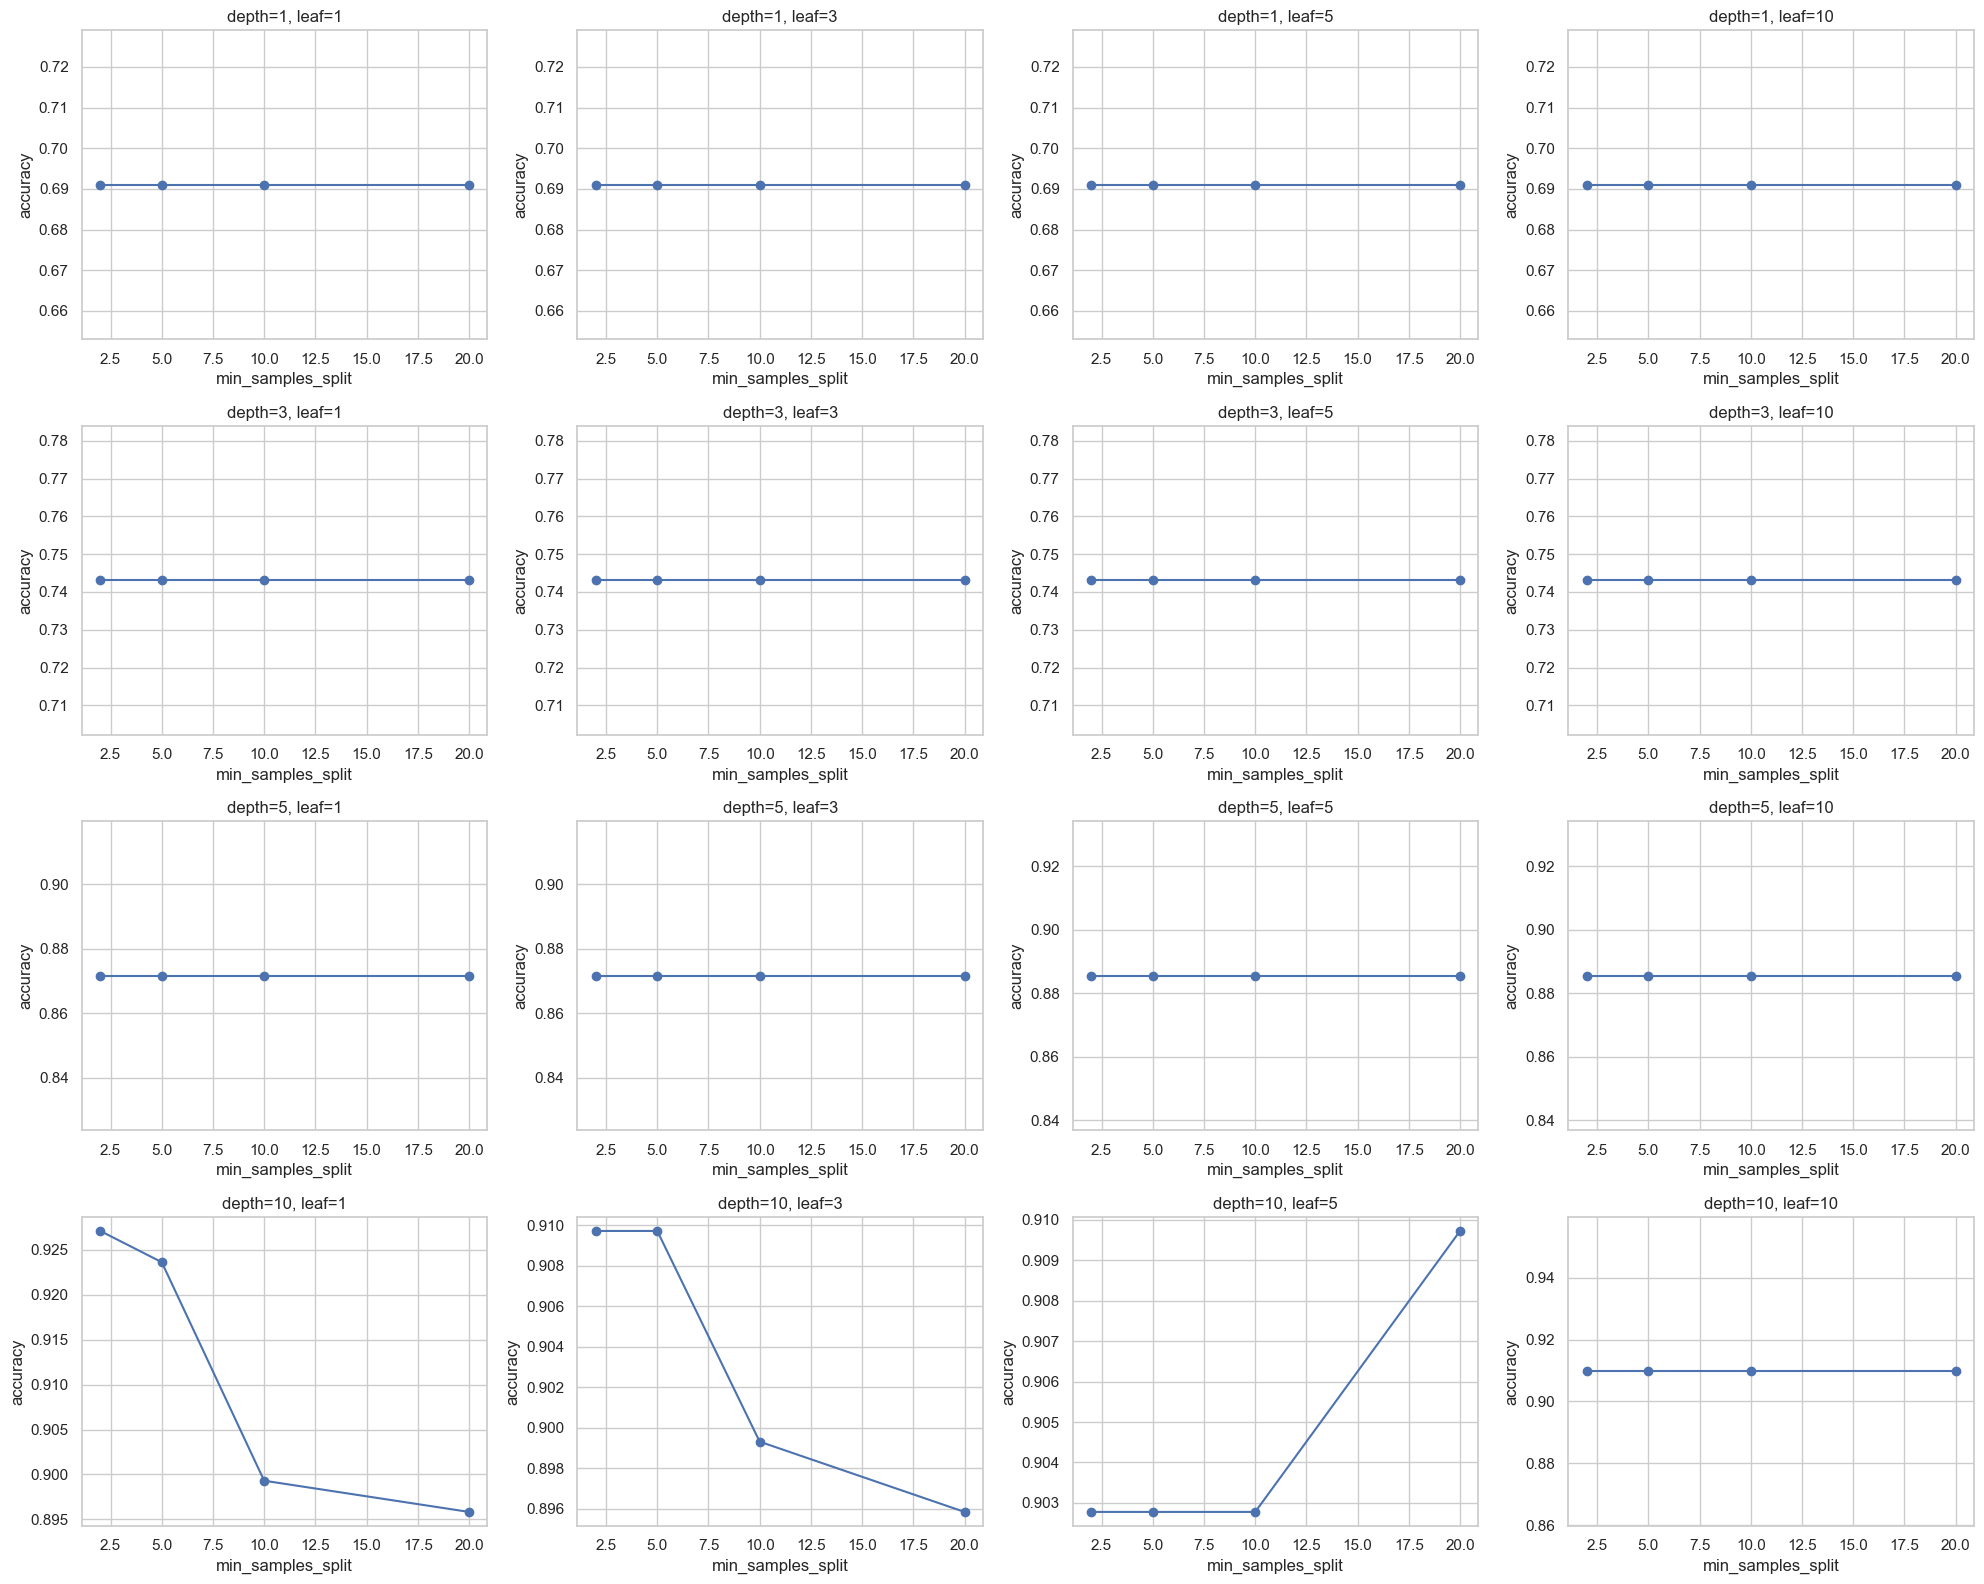

In [45]:
tictactoe = pd.read_csv('datasets/tic-tac-toe-endgame.csv')

encoded = tictactoe.copy()
for col in tictactoe.columns:
    le = LabelEncoder()
    encoded[col] = le.fit_transform(tictactoe[col])

X = encoded.iloc[:, :-1]
y = encoded.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = [1, 3, 5, 10]
leafs = [1, 3, 5, 10]
splits = [2, 5, 10, 20]

fig, axes = plt.subplots(len(depths), len(leafs), figsize=(20, 16))

for i, depth in enumerate(depths):
    for j, leaf in enumerate(leafs):
        accs = []
        for split_val in splits:
            tree = DecisionTree(
                feature_types=['categorical'] * X.shape[1],
                max_depth=depth,
                min_samples_leaf=leaf,
                min_samples_split=split_val
            )
            
            tree.fit(X_train.values, y_train.values)
            y_pred = tree.predict(X_test.values)
            acc = accuracy_score(y_test, y_pred)
            accs.append(acc)
        
        axes[i, j].plot(splits, accs, marker='o')
        axes[i, j].set_title(f'depth={depth}, leaf={leaf}')
        axes[i, j].set_xlabel('min_samples_split')
        axes[i, j].set_ylabel('accuracy')
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [46]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
import importlib
import hw2code
importlib.reload(hw2code)

from hw2code import DecisionTreeWrapper

data_urls = {
    "mush": "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",
    "game": "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data",
    "auto": "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    "child": "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
}

res = list()

for data_name, link in data_urls.items():
    try:
        df = pd.read_csv(link, header=None)
    except Exception as err:
        raise ValueError(f"Ошибка: {link}. {str(err)}")

    if data_name == 'mush':
        targ_idx = 0
    else:
        targ_idx = -1

    X = df.drop(df.columns[targ_idx], axis=1)
    y = df.iloc[:, targ_idx]

    X_enc = X.copy()
    for col in X_enc.columns:
        X_enc[col] = LabelEncoder().fit_transform(X_enc[col])
    
    if data_name == 'auto':
        y_enc = np.where((y == 'unacc') | (y == 'acc'), 0, 1)
    elif data_name == 'child':
        y_enc = np.where((y == 'not_recom') | (y == 'recommend'), 0, 1)
    else:
        y_enc = LabelEncoder().fit_transform(y)

    encoder = OneHotEncoder(sparse_output=False)
    X_ohe = encoder.fit_transform(X_enc)

    sk_model = DecisionTreeClassifier()
    dt_num = DecisionTreeWrapper(["real"] * X_enc.shape[1])  
    dt_cat = DecisionTreeWrapper(["categorical"] * X_enc.shape[1])  
    dt_num_ohe = DecisionTreeWrapper(["real"] * X_ohe.shape[1]) 

    acc_num = cross_val_score(dt_num, X_enc.values, y_enc, cv=10, scoring=make_scorer(accuracy_score)).mean()
    acc_cat = cross_val_score(dt_cat, X_enc.values, y_enc, cv=10, scoring=make_scorer(accuracy_score)).mean()
    acc_ohe = cross_val_score(dt_num_ohe, X_ohe, y_enc, cv=10, scoring=make_scorer(accuracy_score)).mean()
    acc_sk = cross_val_score(sk_model, X_enc.values, y_enc, cv=10, scoring=make_scorer(accuracy_score)).mean()

    res.append([data_name, acc_num, acc_cat, acc_ohe, acc_sk])

df_res = pd.DataFrame(res, columns=["Data", "DT_num", "DT_cat", "DT_ohe", "DT_sklearn"])
print(df_res)

    Data    DT_num    DT_cat    DT_ohe  DT_sklearn
0   mush  0.999261  1.000000  0.999631    0.961123
1   game  0.467533  0.541458  0.543575    0.787346
2   auto  0.942647  0.967546  0.919495    0.942707
3  child  0.999691  0.999846  0.999537    0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Нет, эффективность алгоритмов заметно отличается на разных наборах данных, что показывает отсутствие универсального подхода. На датасете mushrooms наивысшую точность показывает метод, предназначенный для категориальных признаков. Для tic_tac_toe лидером оказывается стандартный алгоритм из библиотеки, который лучше учитывает специфику признаков игры. В случае cars и nursery наиболее точной снова оказывается модель для категориальных данных.
Такие различия в первую очередь объясняются природой самих данных. На mushrooms много качественных признаков, которые хорошо обрабатываются специализированным методом. Для tic_tac_toe преобразование категорий в числа могло нарушить их логическую связь, поэтому универсальный алгоритм, способный найти более сложные паттерны, показал себя лучше. На nursery структура данных оказалась проще, что объясняет высокие результаты всех моделей.
На результаты влияет и компонента случайности, возникающая при разбиении на выборки в кросс-валидации. Чтобы повысить стабильность оценок и улучшить работу алгоритмов, можно зафиксировать начальное состояние (random_state) и экспериментировать с другими методами кодирования признаков.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [52]:
print('(＞﹏＜)')

(＞﹏＜)
